# Pymaceuticals Inc.
---

### Analysis

- Generate Summary Statistics: The average tumor volume and standard deviation for Capomulin and Ramicane is smaller, which could imply there is a correlation between the treatment and the smaller size of the tumor.
- Bar and Pie Charts: Both Capomulin and Ramicane have a higher number of observed timepoints for each mouse, potentially making their datasets more robust and accurate as compared to the others. There is also an even split between male and female mice, which is a good representation.
 - Quartiles, Outliers and Boxplots: The final tumor volume for Capomulin and Ramicane is smaller of the four treatments selected and neither have outliers; however, the values for Capomulin are clustered in a slightly narrower range and are more evenly spread, which could imply more consistentcy with result for the treatment.
 - Line and Scatter Plots: Taking a look at one mouse who was taking Capomulin shows that the tumor size went down significantly starting at day 20. When looking at the mouse weight and average observed tumor volume for Capomulin, there is a positive correlation between the two confirming that the treatment is causing a reduction in the tumor size and overall weight of the mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = study_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_df[study_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = study_df[study_df["Mouse ID"].str.contains("g989")] 
display(duplicate_mouse) 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean_df = study_df.drop(study_df[study_df["Mouse ID"] == "g989"].index)
study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = study_clean_df["Mouse ID"].nunique()
mice_count_clean

248

## Generate Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_regimen = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_regimen = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor_regimen = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor_regimen = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor_regimen = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [8]:
# Assemble the resulting series into a single summary DataFrame.
tumor_regimen_sum1 = pd.DataFrame({"Mean Tumor Volume": mean_tumor_regimen,
                                      "Median Tumor Volume": median_tumor_regimen,
                                      "Tumor Volume Variance": var_tumor_regimen,
                                      "Tumor Volume Std. Dev.": std_tumor_regimen,
                                      "Tumor Volume Std. Err.": sem_tumor_regimen})
tumor_regimen_sum1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table uses the aggregation method in a single line
tumor_regimen_sum2 = study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_regimen_sum2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

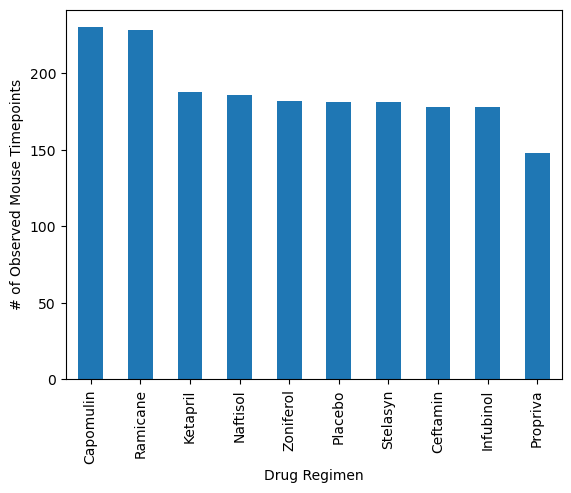

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the count of timepoints by each drug regimin and sort by the total count for each
mouse_timepts = study_clean_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)

# Plot the grouped timepoints by drug regimin in a bar chart
mouse_timepts_plot1 = mouse_timepts.plot.bar(xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints") 
plt.show()

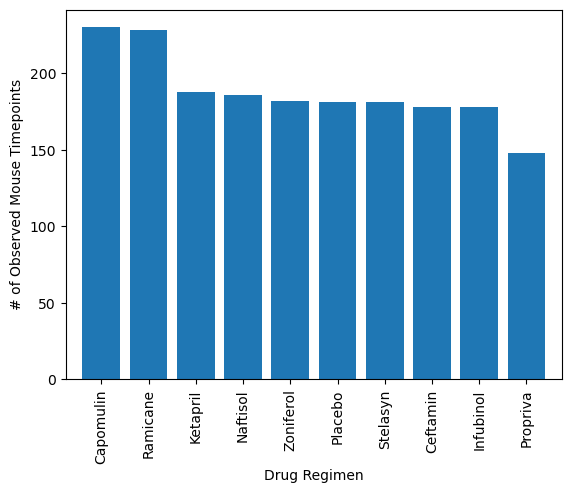

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Reset the index to flatten the multi-index object into a traditional dataframe
mouse_timepts_df = study_clean_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False).reset_index()

# Set the x and y axis to the columns in the dataframe
x_axis = mouse_timepts_df["Drug Regimen"]
y_axis = mouse_timepts_df["Timepoint"]

# Create a bar chart
plt.bar(x_axis, y_axis)

# Create the ticks for the chart's x axis
plt.xticks(x_axis, rotation='vertical')

# Set the limits of the chart's x and y axis
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(y_axis) * 1.05)

# Label the chart's x and y axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

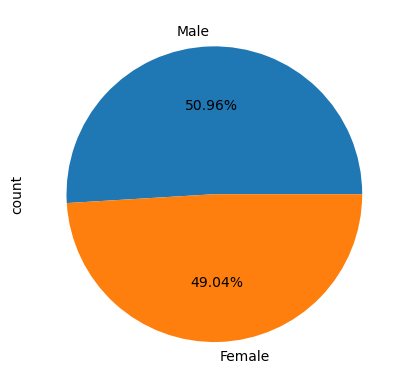

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mouse_gender = study_clean_df["Sex"].value_counts()

# Make the pie chart
mouse_gender_plot = mouse_gender.plot.pie(autopct="%1.2f%%")
plt.show()

# NOTE: Differs from starter code because that pie chart was using the study_df, not the study_clean_df

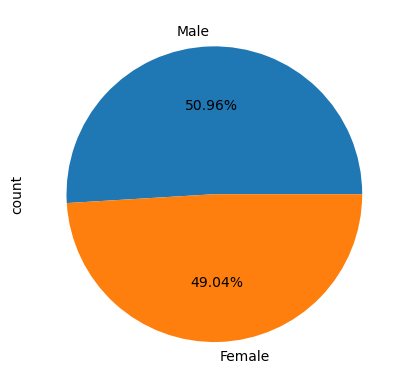

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Use the unique mice counts from earlier to plot a bar chart with plt
plt.ylabel("count")
plt.pie(mouse_gender, labels = ["Male", "Female"], autopct="%1.2f%%")
plt.show()

# NOTE: Differs from starter code because that pie chart was using the study_df, not the study_clean_df

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max = study_clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_mouse_max_df = pd.merge(mouse_max, study_clean_df, on = ["Mouse ID", "Timepoint"])

In [15]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_values = study_mouse_max_df[(study_mouse_max_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"].sort_values()

    # add subset
    tumor_vol.append(tumor_values.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_values.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_values[(tumor_values < lower_bound) | (tumor_values > upper_bound)]

    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


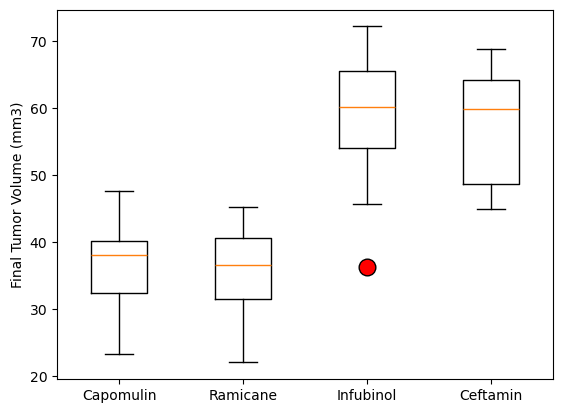

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, flierprops = {"marker": "o", "markersize": 12, "markerfacecolor": "red"})
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], treatments_list)
plt.show()

## Line and Scatter Plots

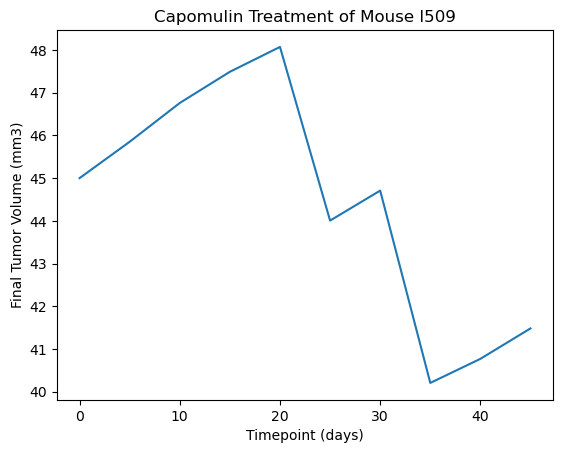

In [17]:
# Get the timepoint and volume information for mouse id l509
mouseid = study_clean_df.loc[(study_clean_df["Mouse ID"] == "l509"), ["Timepoint", "Tumor Volume (mm3)"]]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouseid["Timepoint"], mouseid["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show() 

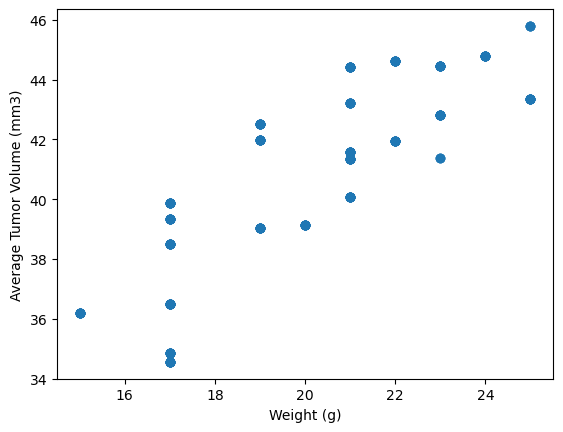

In [18]:
# Get the list of mice and their weight by the group Capomulin
capomulin_group = study_clean_df.loc[(study_clean_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Weight (g)"]]

# Get the list of mice and their average tumow volumne
mouse_tumor_mean = study_clean_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].mean()

# Merge the two on mouse ID for plotting
mouse_wgt_tmr_df = pd.merge(capomulin_group, mouse_tumor_mean, on = ["Mouse ID"]).set_index("Mouse ID")

# Get datasets for mouse weight and and average observed tumor volume for the entire Capomulin regimen
weight = mouse_wgt_tmr_df["Weight (g)"]
volume = mouse_wgt_tmr_df["Tumor Volume (mm3)"]

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show() 

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


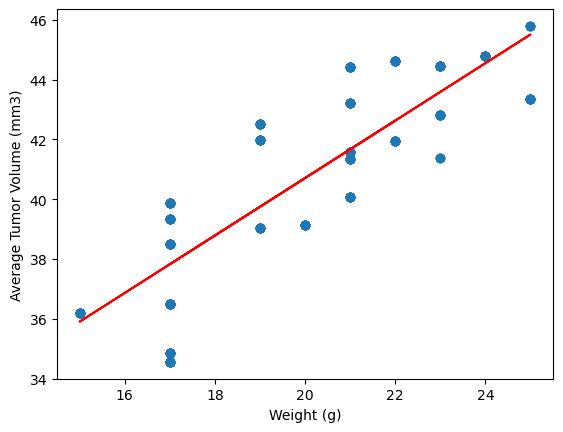

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, volume)
m, b = np.polyfit(weight, volume, 1)

# Plot the scatter plot and add the regression line
plt.scatter(weight, volume, marker = "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight, m * weight + b, color = "red")

# Print the correlation coefficient and show the plot
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()